# Fernando Enrique Quiñonez Garcia
# Examen final 
## Dataset Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


In [2]:
# DataFrame llamado titanic que contenga las columnas survived, sex, age, fare, class, embark_town y alone.
data = sns.load_dataset('titanic')
data.drop('pclass', inplace=True, axis=1)
data.drop('sibsp', inplace=True, axis=1)
data.drop('parch', inplace=True, axis=1)
data.drop('embarked', inplace=True, axis=1)
data.drop('who', inplace=True, axis=1)
data.drop('deck', inplace=True, axis=1)
data.drop('adult_male', inplace=True, axis=1)
data.drop('alive', inplace=True, axis=1)
data['age'] = data['age'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [3]:
#Sustituya los valores nulos de la columna edad (age) por el promedio de edad de los valores existentes en el mismo
#DataFrame y visualice las primeras 10 filas
promedioAge = data["age"].mean()
promedioAge
data['age'] = data['age'].fillna(promedioAge)
data.head(10)

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.000000,7.2500,Third,Southampton,False
1,1,female,38.000000,71.2833,First,Cherbourg,False
2,1,female,26.000000,7.9250,Third,Southampton,True
3,1,female,35.000000,53.1000,First,Southampton,False
4,0,male,35.000000,8.0500,Third,Southampton,True
5,0,male,29.699118,8.4583,Third,Queenstown,True
6,0,male,54.000000,51.8625,First,Southampton,True
7,0,male,2.000000,21.0750,Third,Southampton,False
8,1,female,27.000000,11.1333,Third,Southampton,False
9,1,female,14.000000,30.0708,Second,Cherbourg,False


In [4]:
# Muestre el análisis descriptivo de las columna edad (age) y tarifa (fare).
print('Analisis descriptico de edad ')
print(data['age'].describe())
print('Analisis descriptivo de tarifa ')
print(data['fare'].describe())

Analisis descriptico de edad 
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64
Analisis descriptivo de tarifa 
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


Text(0.5, 0, 'Edad')

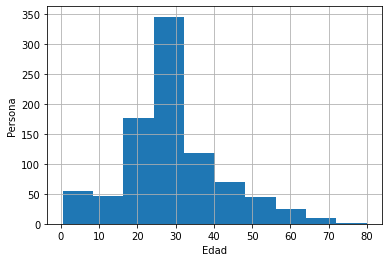

In [5]:
# Realice un histograma para la variable edad y otro para la variable tarifa.
histogramaAge = data['age'].hist()
histogramaAge.set_ylabel("Persona")
histogramaAge.set_xlabel("Edad")

Text(0, 0.5, 'Persona')

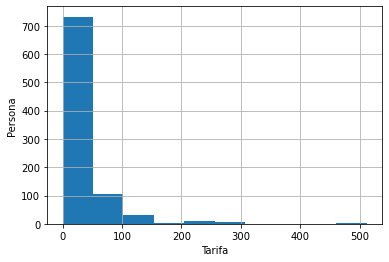

In [6]:
histogramaFare = data['fare'].hist()
histogramaFare.set_xlabel("Tarifa")
histogramaFare.set_ylabel("Persona")

In [7]:
# Codifique las variables categóricas sex, class, embark_town y alone, luego visualice las primeras 10 filas.
data["class"] = data["class"].astype('category')
data["class"] = data["class"].cat.codes

data["sex"] = data["sex"].astype('category')
data["sex"] = data["sex"].cat.codes

data["embark_town"] = data["embark_town"].astype('category')
data["embark_town"] = data["embark_town"].cat.codes

data["alone"] = data["alone"].astype('category')
data["alone"] = data["alone"].cat.codes
data.head(10)

,survived,sex,age,fare,class,embark_town,alone
0,0,1,22.000000,7.2500,2,2,0
1,1,0,38.000000,71.2833,0,0,0
2,1,0,26.000000,7.9250,2,2,1
3,1,0,35.000000,53.1000,0,2,0
4,0,1,35.000000,8.0500,2,2,1
5,0,1,29.699118,8.4583,2,1,1
6,0,1,54.000000,51.8625,0,2,1
7,0,1,2.000000,21.0750,2,2,0
8,1,0,27.000000,11.1333,2,2,0
9,1,0,14.000000,30.0708,1,0,0


<AxesSubplot:>

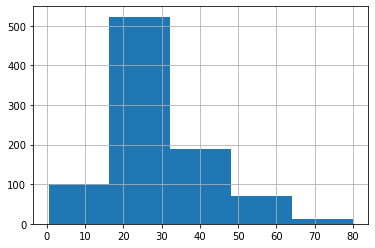

In [8]:
data
data['age'].hist(bins = 5)

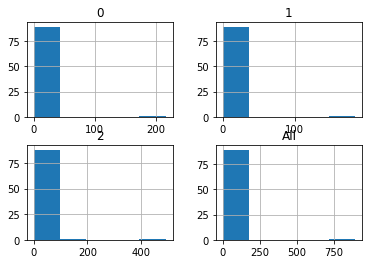

In [9]:
# Elabore un histograma de 5 intervalos que muestre la distribución de  sobrevivientes según la edad (age, survived)
# utilizando la variable survived para agrupar los datos. Agregue una interpretación de los resultados.
pd.crosstab(index=data['age'],columns=data['class'], margins=True).hist(bins=5);

In [10]:
# Genere los grupos para entrenamiento (train) y pruebas (test) a partir del dataset estableciendo un 30% para 
# el tamaño del grupo de entrenamiento estratificando por medio de la variable survived y un random_state = 29.
train, test = train_test_split(data, test_size = 0.7, stratify = data['survived'], random_state = 29)
fn = ['age', 'sex', 'fare', 'class', 'embark_town', 'alone']
cn = ['Sobrevivio', 'Murio']
x_train = train[['age', 'sex', 'fare', 'class', 'embark_town', 'alone']]
y_train = train['survived']
x_test = test[['age', 'sex', 'fare', 'class', 'embark_town', 'alone']]
y_test = test['survived']
x_train.head(10)

,age,sex,fare,class,embark_town,alone
106,21.000000,0,7.6500,2,2,1
72,21.000000,1,73.5000,1,2,1
134,25.000000,1,13.0000,1,2,1
346,40.000000,0,13.0000,1,2,1
443,28.000000,0,13.0000,1,2,1
142,24.000000,0,15.8500,2,2,0
64,29.699118,1,27.7208,0,0,1
139,24.000000,1,79.2000,0,0,1
858,24.000000,0,19.2583,2,0,0
271,25.000000,1,0.0000,2,2,1


La precisión del árbol es de:  0.809


,survived,sex,age,fare,class,embark_town,alone
248,1,1,37.0,52.5542,0,2,0
94,0,1,59.0,7.2500,2,2,1
278,0,1,7.0,29.1250,2,1,0
182,0,1,9.0,31.3875,2,2,0
211,1,0,35.0,21.0000,1,2,1


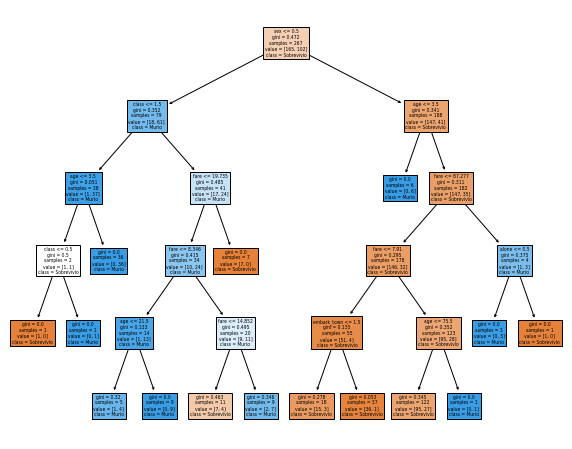

In [11]:
# Sabiendo que la variable de salida es survived (sobrevivió 0=No, 1=Si) genere un árbol de decisión con una profundidad
#de 5 niveles y random_state = 1. Muestre la precisión del árbol de decisión y brinde una interpretación indicando
#cuál de las características utilizadas en el modelo es la de  mayor importancia.
mod_dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
mod_dt.fit(x_train, y_train)
prediction = mod_dt.predict(x_test)
print('La precisión del árbol es de: ', '{:.3f}'.format(metrics.accuracy_score(prediction, y_test)))
plt.figure(figsize=(10, 8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True)
test.head(5)

# Descripción
## Dependiendo de sus atributos tendran mas posibilidades de sobrevivir